# Statistical Regression Analysis: Life Expectancy Dataset

## Module: Applied Statistics & Machine Learning

This notebook implements regularized linear regression and regularized support vector regression techniques to analyze the Life Expectancy dataset.

## Table of Contents
1. Data Loading and Exploration
2. Data Preparation
3. Linear Regression with Regularization
   - L1 (Lasso) Regularization
   - L2 (Ridge) Regularization
   - Elastic Net Regularization
4. Support Vector Regression with Regularization
5. Model Comparison and Interpretation
6. Prediction with New Data

## 1. Data Loading and Exploration

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [11]:
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Display basic information
print(f"Dataset shape: {data.shape}")
print(f"\nFirst 5 rows:\n")
data.head()

Dataset shape: (2938, 22)

First 5 rows:



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
# Check column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [13]:
# Check summary statistics
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [14]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Columns with missing values:")
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Columns with missing values:


,Missing Values,Percentage
Population,652,22.191967
Hepatitis B,553,18.822328
GDP,448,15.248468
Total expenditure,226,7.692308
Alcohol,194,6.603131
Income composition of resources,167,5.684139
Schooling,163,5.547992
thinness 5-9 years,34,1.157250
thinness 1-19 years,34,1.157250
BMI,34,1.157250


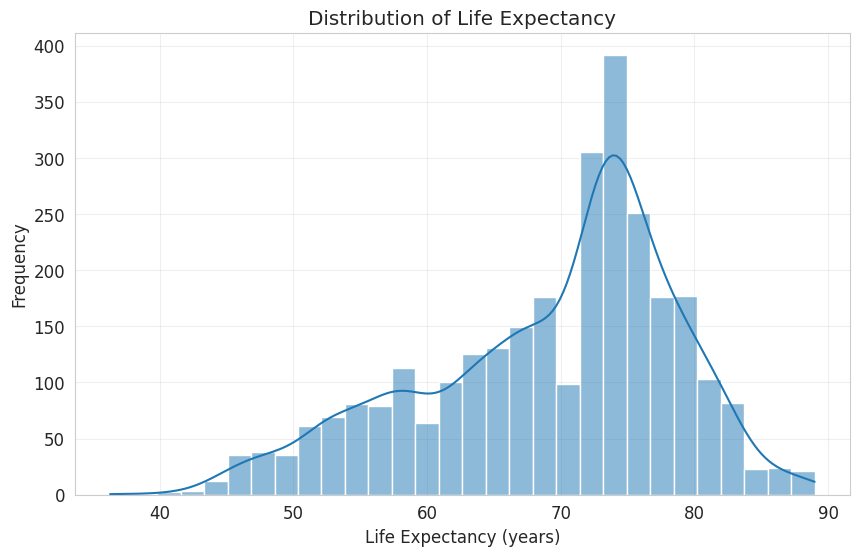

In [15]:
# Check target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Life expectancy ', kde=True) # Add a space after 'Life expectancy'
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

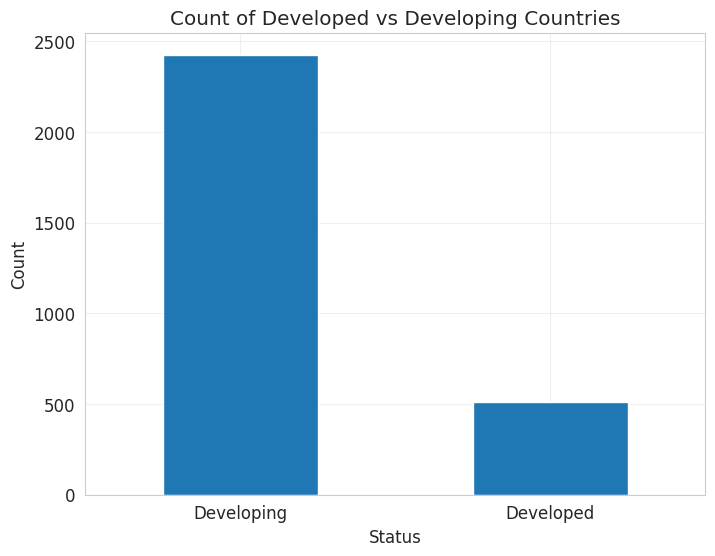

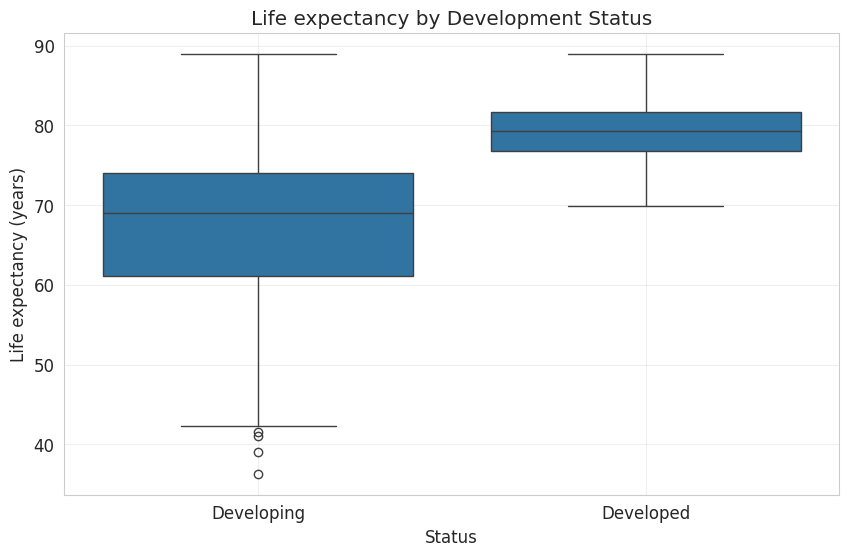

In [16]:
# Check the distribution of status (Developed vs Developing)
status_count = data['Status'].value_counts()
plt.figure(figsize=(8, 6))
status_count.plot(kind='bar')
plt.title('Count of Developed vs Developing Countries')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

# Check life expectancy by development status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Life expectancy ') # Add a space after 'Life expectancy'
plt.title('Life expectancy by Development Status')
plt.xlabel('Status')
plt.ylabel('Life expectancy (years)')
plt.grid(True, alpha=0.3)
plt.show()

## 2. Data Preparation

In this section, we perform the necessary data preparation steps:

1. Handle missing values
2. Convert categorical variables
3. Handle outliers
4. Select relevant features
5. Scale features

In [17]:
def process_data(data):
    """
    Process the raw life expectancy data

    Parameters:
    -----------
    data : pandas.DataFrame
        The raw data to process

    Returns:
    --------
    pandas.DataFrame
        Processed data ready for modeling
    """
    # Make a copy to avoid modifying the original data
    df = data.copy()

    # Step 1: Clean column names
    df.columns = df.columns.str.strip()

    # Step 2: Handle missing values
    # Count missing values
    missing_values = df.isnull().sum()
    print(f"Missing values before imputation:\n{missing_values[missing_values > 0]}")

    # For numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

    # For categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # Step 3: Convert categorical variables
    # Convert 'Status' to dummy variables
    if 'Status' in df.columns:
        df = pd.get_dummies(df, columns=['Status'], drop_first=True)

    # Step 4: Handle potential outliers
    # Using IQR method for potential outliers in the target variable
    Q1 = df['Life expectancy'].quantile(0.25)
    Q3 = df['Life expectancy'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out extreme outliers
    df = df[(df['Life expectancy'] >= lower_bound) &
            (df['Life expectancy'] <= upper_bound)]

    # Step 5: Feature selection - remove 'Year' and 'Country' if they exist
    # These are not predictive features for our model
    if 'Year' in df.columns:
        df = df.drop('Year', axis=1)

    if 'Country' in df.columns:
        df = df.drop('Country', axis=1)

    # Step 6: Check for any remaining missing values
    missing_after = df.isnull().sum().sum()
    if missing_after > 0:
        print(f"Warning: There are still {missing_after} missing values in the data")
    else:
        print("No missing values remain in the dataset")

    print(f"Original dataset shape: {data.shape}")
    print(f"Processed dataset shape: {df.shape}")

    return df

In [18]:
# Apply the data preprocessing function
processed_data = process_data(data)

# Display the processed data
processed_data.head()

Missing values before imputation:
Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
BMI                                 34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
No missing values remain in the dataset
Original dataset shape: (2938, 22)
Processed dataset shape: (2921, 20)


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


### Prepare Data for Modeling

In [19]:
# Split data into features and target
X = processed_data.drop('Life expectancy', axis=1)
y = processed_data['Life expectancy']

# Store feature names for later use
feature_names = X.columns.tolist()
print(f"Number of features: {len(feature_names)}")
print(f"Features: {feature_names}")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Number of features: 19
Features: ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developing']

Training set shape: (2336, 19)
Testing set shape: (585, 19)


## 3. Linear Regression with Regularization

In this section, we implement and analyze different regularization techniques for linear regression:
- L1 (Lasso) Regularization
- L2 (Ridge) Regularization
- Elastic Net Regularization (combining L1 and L2)

### L1 (Lasso) Regularization

In [20]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"CV R² (mean ± std): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    # Return results dictionary
    results = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_scores': cv_scores,
        'cv_r2_mean': np.mean(cv_scores),
        'cv_r2_std': np.std(cv_scores),
        'y_true': y_test,
        'y_pred': y_pred_test
    }

    return results

In [21]:
# Create a range of alphas to test
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Store results
lasso_results = {}
lasso_coefs = {}

# Train and evaluate Lasso models with different alphas
for alpha in alphas:
    print(f"\nTraining Lasso model with alpha = {alpha}")
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    results = evaluate_model(lasso, X_train, y_train, X_test, y_test, f"Lasso (alpha={alpha})")

    # Store results and coefficients
    lasso_results[alpha] = results
    lasso_coefs[alpha] = lasso.coef_

    # Count non-zero coefficients
    non_zero = np.sum(np.abs(lasso.coef_) > 0)
    print(f"Number of non-zero coefficients: {non_zero} out of {len(feature_names)}")

    # Display top coefficients
    coeffs = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso.coef_})
    coeffs = coeffs.sort_values('Coefficient', key=abs, ascending=False)
    print("\nTop 10 Features by Importance:")
    print(coeffs.head(10))


Training Lasso model with alpha = 0.0001

Lasso (alpha=0.0001) Results:
Train MSE: 15.4981
Test MSE: 16.4121
Train MAE: 2.9638
Test MAE: 2.9604
Train R²: 0.8215
Test R²: 0.8108
CV R² (mean ± std): 0.8153 ± 0.0110
Number of non-zero coefficients: 19 out of 19

Top 10 Features by Importance:
                            Feature  Coefficient
7                 under-five deaths   -11.900896
1                     infant deaths    11.688553
0                   Adult Mortality    -2.506039
11                         HIV/AIDS    -2.259954
17                        Schooling     2.114773
16  Income composition of resources     1.134743
10                       Diphtheria     0.941897
6                               BMI     0.809967
8                             Polio     0.605803
12                              GDP     0.513425

Training Lasso model with alpha = 0.001

Lasso (alpha=0.001) Results:
Train MSE: 15.4988
Test MSE: 16.4115
Train MAE: 2.9632
Test MAE: 2.9606
Train R²: 0.8215
Test R²: 

### L2 (Ridge) Regularization

In [22]:
# Store results
ridge_results = {}
ridge_coefs = {}

# Train and evaluate Ridge models with different alphas
for alpha in alphas:
    print(f"\nTraining Ridge model with alpha = {alpha}")
    ridge = Ridge(alpha=alpha, random_state=42)
    results = evaluate_model(ridge, X_train, y_train, X_test, y_test, f"Ridge (alpha={alpha})")

    # Store results and coefficients
    ridge_results[alpha] = results
    ridge_coefs[alpha] = ridge.coef_

    # Display top coefficients
    coeffs = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge.coef_})
    coeffs = coeffs.sort_values('Coefficient', key=abs, ascending=False)
    print("\nTop 10 Features by Importance:")
    print(coeffs.head(10))


Training Ridge model with alpha = 0.0001

Ridge (alpha=0.0001) Results:
Train MSE: 15.4981
Test MSE: 16.4122
Train MAE: 2.9639
Test MAE: 2.9604
Train R²: 0.8215
Test R²: 0.8108
CV R² (mean ± std): 0.8153 ± 0.0110

Top 10 Features by Importance:
                            Feature  Coefficient
7                 under-five deaths   -11.935195
1                     infant deaths    11.723042
0                   Adult Mortality    -2.505920
11                         HIV/AIDS    -2.259856
17                        Schooling     2.114621
16  Income composition of resources     1.134278
10                       Diphtheria     0.941533
6                               BMI     0.809908
8                             Polio     0.605685
12                              GDP     0.513757

Training Ridge model with alpha = 0.001

Ridge (alpha=0.001) Results:
Train MSE: 15.4981
Test MSE: 16.4122
Train MAE: 2.9639
Test MAE: 2.9604
Train R²: 0.8215
Test R²: 0.8108
CV R² (mean ± std): 0.8153 ± 0.0110

To

### Elastic Net Regularization

In [23]:
# For Elastic Net, we'll test different combinations of alpha and l1_ratio
alphas_elastic = [0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]  # 0.1 is mostly Ridge, 0.9 is mostly Lasso

# Store results
elastic_results = {}
elastic_coefs = {}

# Train and evaluate Elastic Net models with different parameters
for alpha in alphas_elastic:
    for l1_ratio in l1_ratios:
        print(f"\nTraining Elastic Net model with alpha = {alpha}, l1_ratio = {l1_ratio}")
        elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=42)
        results = evaluate_model(elastic, X_train, y_train, X_test, y_test,
                               f"Elastic Net (alpha={alpha}, l1_ratio={l1_ratio})")

        # Store results and coefficients
        key = (alpha, l1_ratio)
        elastic_results[key] = results
        elastic_coefs[key] = elastic.coef_

        # Count non-zero coefficients
        non_zero = np.sum(np.abs(elastic.coef_) > 0)
        print(f"Number of non-zero coefficients: {non_zero} out of {len(feature_names)}")

        # Display top coefficients
        coeffs = pd.DataFrame({'Feature': feature_names, 'Coefficient': elastic.coef_})
        coeffs = coeffs.sort_values('Coefficient', key=abs, ascending=False)
        print("\nTop 10 Features by Importance:")
        print(coeffs.head(10))


Training Elastic Net model with alpha = 0.1, l1_ratio = 0.1

Elastic Net (alpha=0.1, l1_ratio=0.1) Results:
Train MSE: 16.3657
Test MSE: 17.1692
Train MAE: 3.0526
Test MAE: 3.0526
Train R²: 0.8115
Test R²: 0.8021
CV R² (mean ± std): 0.8065 ± 0.0121
Number of non-zero coefficients: 19 out of 19

Top 10 Features by Importance:
                            Feature  Coefficient
0                   Adult Mortality    -2.411405
11                         HIV/AIDS    -2.188956
17                        Schooling     1.932861
16  Income composition of resources     1.364552
10                       Diphtheria     1.019624
6                               BMI     0.851401
8                             Polio     0.694450
18                Status_Developing    -0.516076
12                              GDP     0.407463
7                 under-five deaths    -0.402929

Training Elastic Net model with alpha = 0.1, l1_ratio = 0.5

Elastic Net (alpha=0.1, l1_ratio=0.5) Results:
Train MSE: 16.3639
Test 

## 4. Support Vector Regression with Regularization

SVR uses a different form of regularization through the C parameter (higher C means less regularization). We'll investigate the impact of this regularization approach.

In [24]:
# Define SVR parameters to test
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf']
epsilons = [0.1, 0.2]

# Store results
svr_results = {}

# Train and evaluate SVR models with different parameters
for kernel in kernels:
    for C in C_values:
        for epsilon in epsilons:
            print(f"\nTraining SVR model with kernel={kernel}, C={C}, epsilon={epsilon}")

            # Skip some combinations to reduce computation time
            if kernel == 'linear' and C > 10 and epsilon > 0.1:
                continue

            # Create SVR model
            svr = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma='scale')

            # Train and evaluate
            try:
                results = evaluate_model(svr, X_train, y_train, X_test, y_test,
                                     f"SVR ({kernel}, C={C}, epsilon={epsilon})")

                # Store results
                key = (kernel, C, epsilon)
                svr_results[key] = results

                # For linear kernel, we can analyze coefficients
                if kernel == 'linear' and hasattr(svr, 'coef_'):
                    coeffs = pd.DataFrame({'Feature': feature_names, 'Coefficient': svr.coef_[0]})
                    coeffs = coeffs.sort_values('Coefficient', key=abs, ascending=False)
                    print("\nTop 10 Features by Importance:")
                    print(coeffs.head(10))
            except Exception as e:
                print(f"Error training SVR model: {e}")
                continue


Training SVR model with kernel=linear, C=0.1, epsilon=0.1

SVR (linear, C=0.1, epsilon=0.1) Results:
Train MSE: 16.7424
Test MSE: 18.4512
Train MAE: 2.9767
Test MAE: 3.0869
Train R²: 0.8072
Test R²: 0.7873
CV R² (mean ± std): 0.8003 ± 0.0147

Top 10 Features by Importance:
                            Feature  Coefficient
0                   Adult Mortality    -3.167701
11                         HIV/AIDS    -2.071429
17                        Schooling     1.905855
16  Income composition of resources     1.792361
7                 under-five deaths    -1.364633
1                     infant deaths     1.251400
10                       Diphtheria     0.746285
6                               BMI     0.582860
5                           Measles    -0.469621
8                             Polio     0.463141

Training SVR model with kernel=linear, C=0.1, epsilon=0.2

SVR (linear, C=0.1, epsilon=0.2) Results:
Train MSE: 16.7303
Test MSE: 18.4720
Train MAE: 2.9771
Test MAE: 3.0886
Train R²: 0.

## 5. Model Comparison and Interpretation

Now we'll compare all the models we've built and analyze their performance and interpretability. We'll also implement Random Forest for comparison.


Random Forest Results:
Train MSE: 1.0743
Test MSE: 3.2840
Train MAE: 0.7168
Test MAE: 1.2202
Train R²: 0.9876
Test R²: 0.9621
CV R² (mean ± std): 0.9511 ± 0.0077


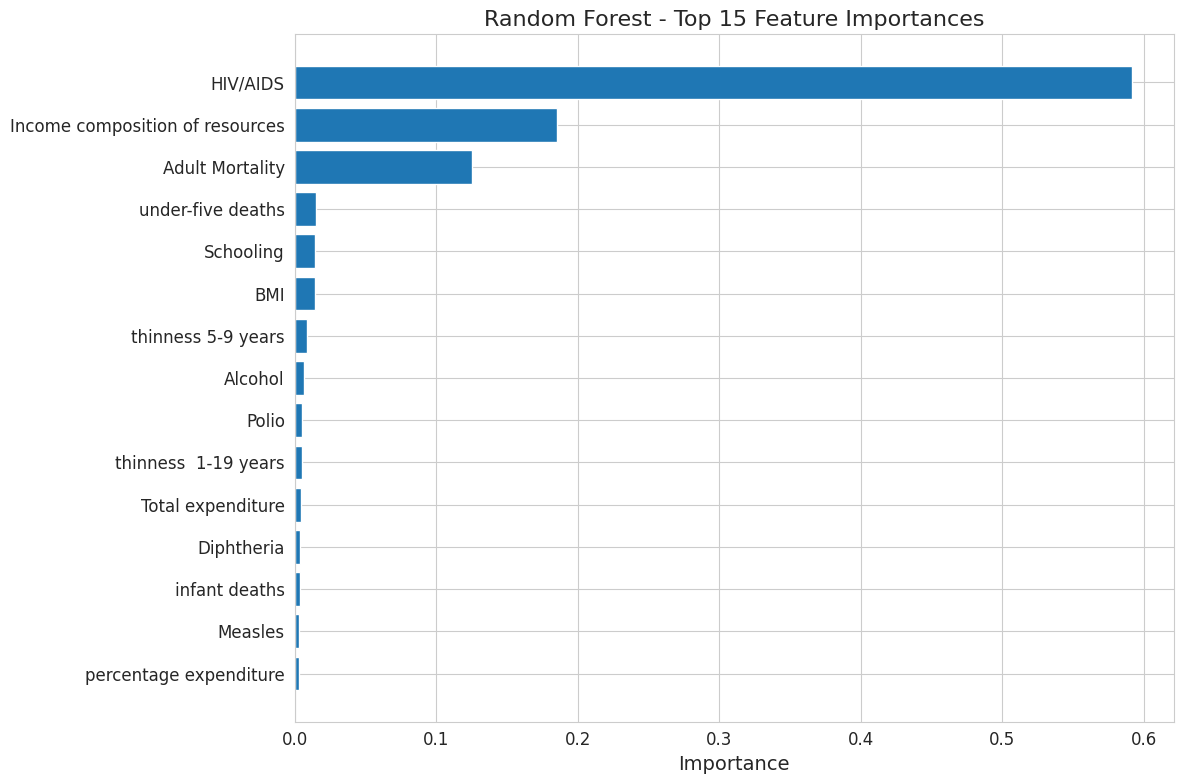


Top 15 features by importance:
                            Feature  Importance
11                         HIV/AIDS    0.591822
16  Income composition of resources    0.185438
0                   Adult Mortality    0.125359
7                 under-five deaths    0.014912
17                        Schooling    0.014579
6                               BMI    0.014133
15               thinness 5-9 years    0.009101
2                           Alcohol    0.006984
8                             Polio    0.005409
14             thinness  1-19 years    0.005190
9                 Total expenditure    0.004396
10                       Diphtheria    0.004154
1                     infant deaths    0.003812
5                           Measles    0.003339
3            percentage expenditure    0.003209


In [25]:
# Train a Random Forest model for comparison
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_results = evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'][:15], feature_importances['Importance'][:15])
plt.xlabel('Importance', fontsize=14)
plt.title('Random Forest - Top 15 Feature Importances', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 15 features by importance:")
print(feature_importances.head(15))

In [26]:
# Select best models from each category
# For simplicity, we'll choose models with good performance and interpretability

# Find best Lasso model
best_lasso_alpha = max(lasso_results.keys(), key=lambda x: lasso_results[x]['test_r2'])
best_lasso = lasso_results[best_lasso_alpha]
best_lasso_name = f"Lasso (alpha={best_lasso_alpha})"

# Find best Ridge model
best_ridge_alpha = max(ridge_results.keys(), key=lambda x: ridge_results[x]['test_r2'])
best_ridge = ridge_results[best_ridge_alpha]
best_ridge_name = f"Ridge (alpha={best_ridge_alpha})"

# Find best Elastic Net model
best_elastic_key = max(elastic_results.keys(), key=lambda x: elastic_results[x]['test_r2'])
best_elastic = elastic_results[best_elastic_key]
best_elastic_name = f"Elastic Net (alpha={best_elastic_key[0]}, l1_ratio={best_elastic_key[1]})"

# Find best SVR model
best_svr_key = max(svr_results.keys(), key=lambda x: svr_results[x]['test_r2'])
best_svr = svr_results[best_svr_key]
best_svr_name = f"SVR ({best_svr_key[0]}, C={best_svr_key[1]}, epsilon={best_svr_key[2]})"

# Compile results for comparison
models = [best_lasso_name, best_ridge_name, best_elastic_name, best_svr_name, "Random Forest"]
test_r2 = [best_lasso['test_r2'], best_ridge['test_r2'], best_elastic['test_r2'],
           best_svr['test_r2'], rf_results['test_r2']]
test_mse = [best_lasso['test_mse'], best_ridge['test_mse'], best_elastic['test_mse'],
            best_svr['test_mse'], rf_results['test_mse']]
test_mae = [best_lasso['test_mae'], best_ridge['test_mae'], best_elastic['test_mae'],
            best_svr['test_mae'], rf_results['test_mae']]

# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': models,
    'R² Score': test_r2,
    'MSE': test_mse,
    'MAE': test_mae
})

print("Model Comparison:")
comparison.set_index('Model')

Model Comparison:


,R² Score,MSE,MAE
Model,,,
Lasso (alpha=0.001),0.810818,16.411544,2.960566
Ridge (alpha=0.1),0.810818,16.411532,2.960516
"Elastic Net (alpha=0.1, l1_ratio=0.1)",0.802084,17.169228,3.052568
"SVR (rbf, C=100, epsilon=0.2)",0.939258,5.269340,1.440237
Random Forest,0.962144,3.284047,1.220177


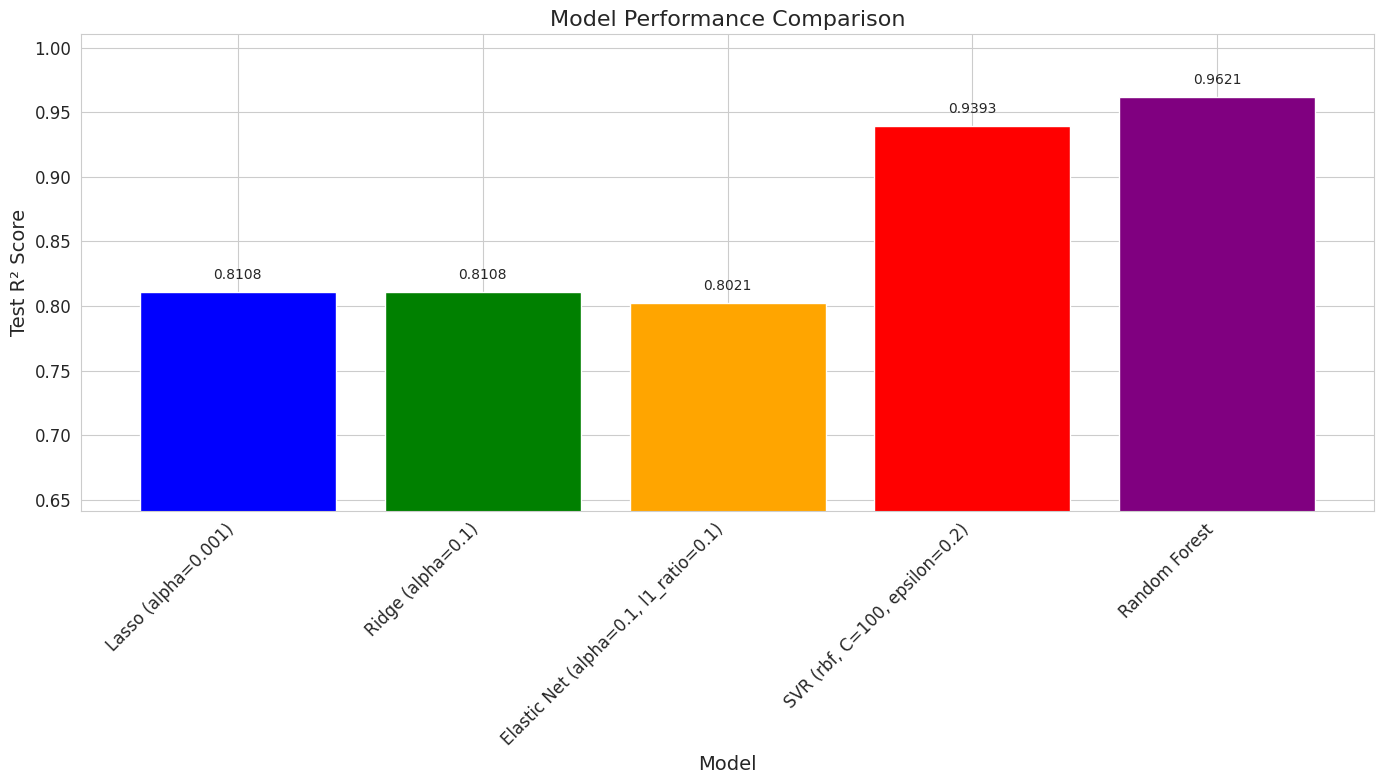

In [27]:
# Visualize model comparison
plt.figure(figsize=(14, 8))
plt.bar(models, test_r2, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test R² Score', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8 * min(test_r2), 1.05 * max(test_r2))  # Adjust y-axis to highlight differences

# Add value labels
for i, v in enumerate(test_r2):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Prediction with New Data

In this section, we'll demonstrate how to use our best models to make predictions on new data.

In [28]:
# Create a sample data point
# We'll create a hypothetical country with realistic values

# First, let's see the feature names and their ranges
feature_ranges = pd.DataFrame({
    'Feature': feature_names,
    'Min': X.min(),
    'Max': X.max(),
    'Mean': X.mean(),
    'Median': X.median()
})

feature_ranges

,Feature,Min,Max,Mean,Median
Adult Mortality,Adult Mortality,1.0,699.0,1.626987e+02,1.440000e+02
infant deaths,infant deaths,0.0,1800.0,3.028757e+01,3.000000e+00
Alcohol,Alcohol,0.01,17.87,4.554646e+00,3.755000e+00
percentage expenditure,percentage expenditure,0.0,19479.91161,7.423968e+02,6.733379e+01
Hepatitis B,Hepatitis B,1.0,99.0,8.303047e+01,9.200000e+01
Measles,Measles,0.0,212183.0,2.414856e+03,1.600000e+01
BMI,BMI,1.0,87.3,3.848264e+01,4.350000e+01
under-five deaths,under-five deaths,0.0,2500.0,4.196405e+01,4.000000e+00
Polio,Polio,3.0,99.0,8.270763e+01,9.300000e+01
Total expenditure,Total expenditure,0.37,17.6,5.912249e+00,5.755000e+00


In [29]:
# Create a sample country with average values for most features
sample_country = X.median().to_dict()

# Modify a few features to simulate a developing country with specific characteristics
# (Adjust these based on your actual feature columns)
sample_country.update({
    'Adult Mortality': 200,  # Higher than median
    'infant deaths': 30,     # Higher than median
    'Alcohol': 2.5,          # Lower than median
    'BMI': 40,               # Higher than median
    'Total expenditure': 5,  # Lower than median
    'GDP': 1500,             # Lower than median
    'Schooling': 8,          # Lower than median
    'Status_Developing': 1   # Developing country
})

# Create a pandas DataFrame for the sample
sample_df = pd.DataFrame([sample_country])

# Ensure same column order as training data
sample_df = sample_df[X.columns]

# Scale the sample using the same scaler used for the training data
sample_scaled = scaler.transform(sample_df)

# Display the sample data (before scaling)
sample_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,200,30,2.5,67.333787,92.0,16.0,40,4.0,93.0,5,93.0,0.1,1500,1386542.0,3.3,3.3,0.677,8,1


In [30]:
# Make predictions with all models
predictions = {
    best_lasso_name: best_lasso['model'].predict(sample_scaled)[0],
    best_ridge_name: best_ridge['model'].predict(sample_scaled)[0],
    best_elastic_name: best_elastic['model'].predict(sample_scaled)[0],
    best_svr_name: best_svr['model'].predict(sample_scaled)[0],
    "Random Forest": rf.predict(sample_scaled)[0]
}

# Display predictions
predictions_df = pd.DataFrame(predictions.items(), columns=['Model', 'Predicted Life Expectancy'])
predictions_df = predictions_df.sort_values('Predicted Life Expectancy')

print("Predictions for the sample country:")
predictions_df

Predictions for the sample country:


,Model,Predicted Life Expectancy
2,"Elastic Net (alpha=0.1, l1_ratio=0.1)",67.624708
4,Random Forest,68.124857
3,"SVR (rbf, C=100, epsilon=0.2)",69.598383
0,Lasso (alpha=0.001),69.817783
1,Ridge (alpha=0.1),69.856955


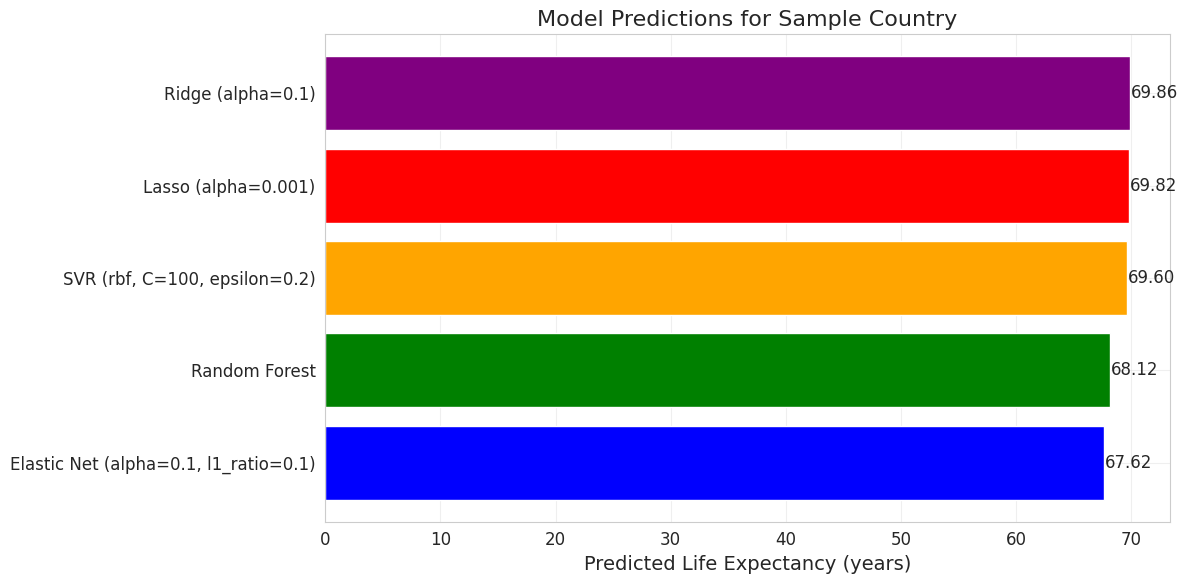

In [31]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.barh(predictions_df['Model'], predictions_df['Predicted Life Expectancy'],
        color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Predicted Life Expectancy (years)', fontsize=14)
plt.title('Model Predictions for Sample Country', fontsize=16)
plt.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(predictions_df['Predicted Life Expectancy']):
    plt.text(v + 0.1, i, f"{v:.2f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()